# Zadanie:

Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

## zad.1
Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b>

In [1]:
using Roots, Plots, DataFrames, ForwardDiff

In [2]:
function intervalFalsi(f, a, b)
    tracks = Roots.Tracks(Float64, Float64)
    find_zero(f, (a, b), FalsePosition(), verbose=true)
    return tracks
end
    
function derivativeNewton(f, start)
    D(f) = x -> ForwardDiff.derivative(f, float(x))
    tracks = Roots.Tracks(Float64, Float64)
    find_zero((f, D(f)), 0.0, Roots.Newton(), verbose=true, tracks=tracks)
    return tracks
end

function derivativeApproxSecant(f, start)
    tracks = Roots.Tracks(Float64, Float64)
    find_zero(f, 0.0, Order1(), verbose=true)
    return tracks
end

derivativeApproxSecant (generic function with 1 method)

In [3]:
f1(x) = sin(x) - x / 2
f2(x) = x * exp(-x)
f3(x) = (x + 3) * (x - 1)^2
f4(x) = x^3
f5(x) = x^3 - 2 * x - 5
f6(x) = (x - 1)^7

f6 (generic function with 1 method)

In [4]:
df = DataFrame(f = String[], method = String[], iterations = Int64[], calls = Int64[], x_zero = Float64[], isZero = Bool[])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool


In [5]:
function test(f, a, b)
    intervalFalsi(f, a, b)
    derivativeNewton(f, (a + b) / 2)
    derivativeApproxSecant(f, (a + b) / 2)
end

test (generic function with 1 method)

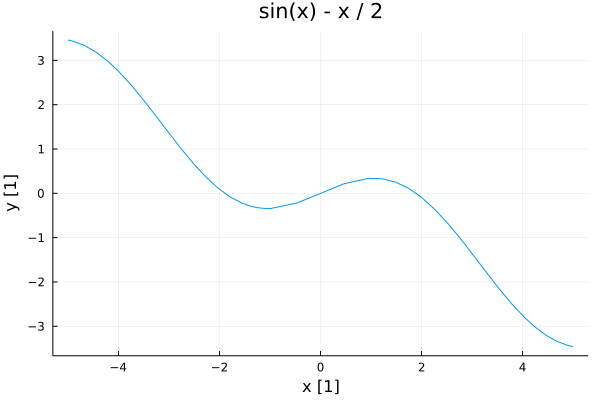

In [6]:
plot(f1, -5, 5, xlab="x [1]", ylab="y [1]", label="", title="sin(x) - x / 2")

In [7]:
test(f1, -5, 5)

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 9
* function evaluations ≈ 11
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 5,	 fx₂ = -3.4589242746631386
x₃ = 2.5,	 fx₃ = -0.65152785589604356
x₄ = 1.25,	 fx₄ = 0.3239846193555862
x₅ = 1.6651466890159652,	 fx₅ = 0.16297896098014875
x₆ = 1.9446763851217526,	 fx₆ = -0.041420950418796343
x₇ = 1.8880306380481127,	 fx₇ = 0.0060864607812989302
x₈ = 1.8952878661159387,	 fx₈ = 0.00016902681276442788
x₉ = 1.8954942966408586,	 fx₉ = -2.4248700047913019e-08
x₁₀ = 1.8954942670304449,	 fx₁₀ = 2.8961277820371834e-12
x₁₁ = 1.8954942670339809,	 fx₁₁ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 3.027727226159662e-06
x₂ = 0,	 fx₂ = 0



Algorithm has not been run

In [8]:
push!(df, ["sin(x) - x/2" "interval" 9 11 1.895494267033981 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x/2" "derivative" 1 2 0.0 iszero(f1(0.0))])
push!(df, ["sin(x) - x/2" "derivativeApprox" 0 2 0.0 iszero(f1(0.0))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1


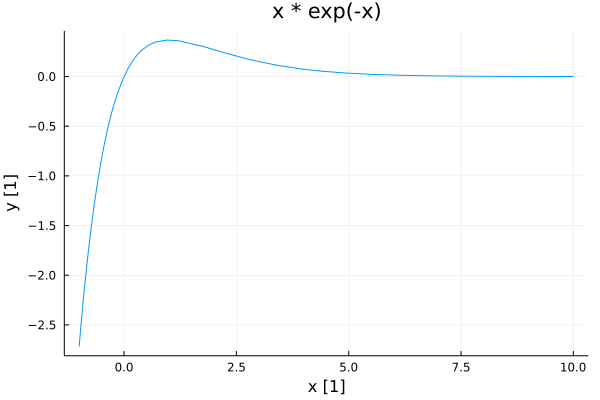

In [9]:
plot(f2, -1, 10, xlab="x [1]", ylab="y [1]", label="", title="x * exp(-x)")

In [10]:
test(f2, -1, 10)

Results of univariate zero finding:

* Converged to: 9.094947017729282e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 10,	 fx₂ = 0.00045399929762484856
x₃ = 5,	 fx₃ = 0.033689734995427337
x₄ = 2.5,	 fx₄ = 0.20521249655974699
x₅ = 1.25,	 fx₅ = 0.35813099607523763
x₆ = 0.625,	 fx₆ = 0.33453839282436892
x₇ = 0.3125,	 fx₇ = 0.22862988404582557
x₈ = 0.15625,	 fx₈ = 0.13364770739178478
x₉ = 0.078125,	 fx₉ = 0.072253813532516004
x₁₀ = 0.0390625,	 fx₁₀ = 0.037566039125211927
x₁₁ = 0.01953125,	 fx₁₁ = 0.019153481428506612
x₁₂ = 0.009765625,	 fx₁₂ = 0.0096707217175157068
x₁₃ = 0.0048828125,	 fx₁₃ = 0.0048590287551272607
x₁₄ = 0.00244140625,	 fx₁₄ = 0.0024354530555624979
x₁₅ = 0.001220703125,	 fx₁₅ = 0.0012192139180053556
x₁₆ = 0.0006103515625,	 fx₁₆ = 0.00060997914713386539
x₁₇ = 0.00030517578125,	 fx₁₇ = 0.00030508266320194771
x₁₈ = 0.000152587890625,	 fx₁₈ = 0.00015256460933690111
x₁₉ = 7.62939453125e-05,	 fx₁₉ = 7.6

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 0,	 fx₂ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 6.0554177839757365e-06
x₂ = 0,	 fx₂ = 0



Algorithm has not been run

In [11]:
push!(df, ["x * exp(-x)" "interval" 40 42 9.094947017729282e-12 iszero(f2(9.094947017729282e-12))])
push!(df, ["x * exp(-x)" "derivative" 1 2 0.0 iszero(f2(0.0))])
push!(df, ["x * exp(-x)" "derivativeApprox" 0 2 0.0 iszero(f2(0.0))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1
4,x * exp(-x),interval,40,42,9.09495e-12,0
5,x * exp(-x),derivative,1,2,0.0,1
6,x * exp(-x),derivativeApprox,0,2,0.0,1


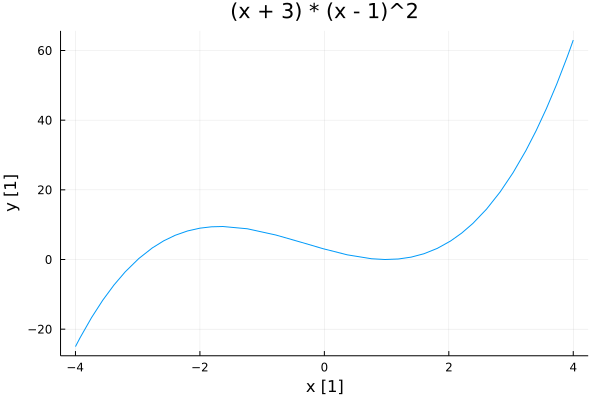

In [12]:
plot(f3, -4, 4, xlab="x [1]", ylab="y [1]", label="", title="(x + 3) * (x - 1)^2")

In [13]:
test(f3, -4, 4)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = -25
x₂ = 0,	 fx₂ = 3
x₃ = -0.42857142857142855,	 fx₃ = 5.2478134110787176
x₄ = -1.4845995893223822,	 fx₄ = 9.3549230349375367
x₅ = -2.9925453312690409,	 fx₅ = 0.11883053727973025
x₆ = -3.0115798361696404,	 fx₆ = -0.18635167233037822
x₇ = -2.9999569049878421,	 fx₇ = 0.00068950533716640111
x₈ = -2.9999997515587591,	 fx₈ = 3.9750593608262766e-06
x₉ = -3.0000000000000231,	 fx₉ = -3.6948222259525634e-13
x₁₀ = -3,	 fx₁₀ = 0



Results of univariate zero finding:

* Converged to: 0.9999999893171166
* Algorithm: Roots.Newton()
* iterations: 26
* function evaluations ≈ 52
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 3
x₂ = 0.59999999999999998,	 fx₂ = 0.57600000000000018
x₃ = 0.81176470588235294,	 fx₃ = 0.13506045186240584
x₄ = 0.90826507818317204,	 fx₄ = 0.032889207013273039
x₅ = 0.95467723287473649,	 fx₅ = 0.008123512971538743
x₆ = 0.97746922076976495,	 fx₆ = 0.0020191066159544178
x₇ = 0.98876660798474947,	 fx₇ = 0.00050333885308786899
x₈ = 0.99439122417482817,	 fx₈ = 0.00012565702210396592
x₉ = 0.99719758237940248,	 fx₉ = 3.1392169169394192e-05
x₁₀ = 0.99859928255261032,	 fx₁₀ = 7.8452892489345154e-06
x₁₁ = 0.99929976396633591,	 fx₁₁ = 1.9609786642799847e-06
x₁₂ = 0.99964991263687364,	 fx₁₂ = 4.9020174016911134e-07
x₁₃ = 0.99982496397951515,	 fx₁₃ = 1.225450711836327e-07
x₁₄ = 0.99991248390473375,	 fx₁₄ = 3.0635597430973551e-08
x₁₅ = 0.99995624243107428,	 fx₁₅ = 7.6588

Results of univariate zero finding:

* Converged to: 0.9999999886120837
* Algorithm: Secant()
* iterations: 37
* function evaluations ≈ 39
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 2.9999697227644067
x₂ = 0,	 fx₂ = 3
x₃ = 0.60000072665724669,	 fx₃ = 0.57599802349376761
x₄ = 0.74257455126588756,	 fx₄ = 0.24801241260040122
x₅ = 0.85038439730926052,	 fx₅ = 0.08619019465664586
x₆ = 0.9078063739355543,	 fx₆ = 0.033215043839825133
x₇ = 0.94380954601913736,	 fx₇ = 0.012452054582524767
x₈ = 0.96540149785098539,	 fx₈ = 0.0047468090470904525
x₉ = 0.97870319885823054,	 fx₉ = 0.0018045557117044276
x₁₀ = 0.98686145642202372,	 fx₁₀ = 0.00068821731656964601
x₁₁ = 0.99189098344797522,	 fx₁₁ = 0.00026249138005983306
x₁₂ = 0.99499205711267502,	 fx₁₂ = 0.000100192371187443
x₁₃ = 0.99690644910959414,	 fx₁₃ = 3.8250622987424955e-05
x₁₄ = 0.99808863541611936,	 fx₁₄ = 1.4606275473965125e-05
x₁₅ = 0.99881892999687816,	 fx₁₅ = 5.5780579034256801e

Algorithm has not been run

In [14]:
push!(df, ["(x + 3) * (x - 1)^2" "interval" 8 10 -3.0 iszero(f3(-3.0))])
push!(df, ["(x + 3) * (x - 1)^2" "derivative" 26 52 0.9999999893171166 iszero(f3(0.9999999893171166))])
push!(df, ["(x + 3) * (x - 1)^2" "derivativeApprox" 37 39 0.9999999886120837 iszero(f3(0.9999999886120837))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1
4,x * exp(-x),interval,40,42,9.09495e-12,0
5,x * exp(-x),derivative,1,2,0.0,1
6,x * exp(-x),derivativeApprox,0,2,0.0,1
7,(x + 3) * (x - 1)^2,interval,8,10,-3.0,1
8,(x + 3) * (x - 1)^2,derivative,26,52,1.0,0
9,(x + 3) * (x - 1)^2,derivativeApprox,37,39,1.0,0


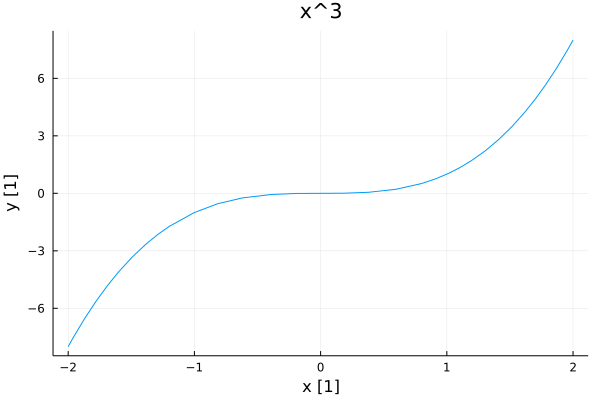

In [15]:
plot(f4, -2, 2, xlab="x [1]", ylab="y [1]", label="", title="x^3")

In [16]:
intervalFalsi(f4, -2, 2)

Results of univariate zero finding:

* Converged to: 7.62939453125e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 18
* function evaluations ≈ 20
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 2,	 fx₂ = 8
x₃ = 1,	 fx₃ = 1
x₄ = 0.5,	 fx₄ = 0.125
x₅ = 0.25,	 fx₅ = 0.015625
x₆ = 0.125,	 fx₆ = 0.001953125
x₇ = 0.0625,	 fx₇ = 0.000244140625
x₈ = 0.03125,	 fx₈ = 3.0517578125e-05
x₉ = 0.015625,	 fx₉ = 3.814697265625e-06
x₁₀ = 0.0078125,	 fx₁₀ = 4.76837158203125e-07
x₁₁ = 0.00390625,	 fx₁₁ = 5.9604644775390625e-08
x₁₂ = 0.001953125,	 fx₁₂ = 7.4505805969238281e-09
x₁₃ = 0.0009765625,	 fx₁₃ = 9.3132257461547852e-10
x₁₄ = 0.00048828125,	 fx₁₄ = 1.1641532182693481e-10
x₁₅ = 0.000244140625,	 fx₁₅ = 1.4551915228366852e-11
x₁₆ = 0.0001220703125,	 fx₁₆ = 1.8189894035458565e-12
x₁₇ = 6.103515625e-05,	 fx₁₇ = 2.2737367544323206e-13
x₁₈ = 3.0517578125e-05,	 fx₁₈ = 2.8421709430404007e-14
x₁₉ = 1.52587890625e-05,	 fx₁₉ = 3.5527136788005009e-15
x₂

Algorithm has not been run

In [17]:
derivativeNewton(f4, (-2 + 2) / 2)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = NaN,	 fx₂ = NaN



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [18]:
derivativeApproxSecant(f4, (-2 + 2) / 2)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ≈ 2
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 2.2204460492503136e-16
x₂ = 0,	 fx₂ = 0



Algorithm has not been run

In [19]:
push!(df, ["x^3" "interval" 18 20 7.62939453125e-6 iszero(f4(7.62939453125e-6))])
push!(df, ["x^3" "derivativeApprox" 0 2 0.0 iszero(f4(0.0))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1
4,x * exp(-x),interval,40,42,9.09495e-12,0
5,x * exp(-x),derivative,1,2,0.0,1
6,x * exp(-x),derivativeApprox,0,2,0.0,1
7,(x + 3) * (x - 1)^2,interval,8,10,-3.0,1
8,(x + 3) * (x - 1)^2,derivative,26,52,1.0,0
9,(x + 3) * (x - 1)^2,derivativeApprox,37,39,1.0,0


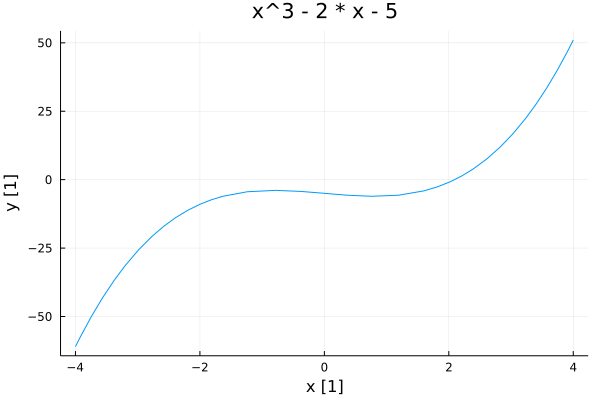

In [20]:
plot(f5, -4, 4, xlab="x [1]", ylab="y [1]", label="", title="x^3 - 2 * x - 5")

In [21]:
test(f5, -4, 4)

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 11
* function evaluations ≈ 13
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -5
x₂ = 4,	 fx₂ = 51
x₃ = 0.35714285714285721,	 fx₃ = -5.6687317784256557
x₄ = 0.72154804854050514,	 fx₄ = -6.0674353919397364
x₅ = 1.3516846166235208,	 fx₅ = -5.2337720934477812
x₆ = 2.9380352792144109,	 fx₆ = 14.485200698567038
x₇ = 1.7727307794161751,	 fx₇ = -2.97452316447017
x₈ = 1.9712577008899612,	 fx₈ = -1.2824900171327913
x₉ = 2.1014663142878316,	 fx₉ = 0.077480258093860499
x₁₀ = 2.0940480661423497,	 fx₁₀ = -0.0056172473168762949
x₁₁ = 2.0945495268575081,	 fx₁₁ = -2.181706886883461e-05
x₁₂ = 2.0945514815438702,	 fx₁₂ = 1.7227996806923329e-11
x₁₃ = 2.0945514815423265,	 fx₁₃ = -8.8817841970012523e-16



Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 19
* function evaluations ≈ 38
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -5
x₂ = -2.5,	 fx₂ = -15.625
x₃ = -1.5671641791044775,	 fx₃ = -5.714632451465107
x₄ = -0.50259244508667966,	 fx₄ = -4.1217695422221725
x₅ = -3.8207064676993294,	 fx₅ = -53.132487962368174
x₆ = -2.5493933913606064,	 fx₆ = -16.470757614024016
x₇ = -1.6081114997282251,	 fx₇ = -5.9423896750176617
x₈ = -0.57610043366023933,	 fx₈ = -4.0390020905449111
x₉ = -4.5977095833821693,	 fx₉ = -92.995257569234539
x₁₀ = -3.083543146726655,	 fx₁₀ = -28.151976870282013
x₁₁ = -2.0221942554643366,	 fx₁₁ = -9.2249089970538503
x₁₂ = -1.1237641075795191,	 fx₁₂ = -4.1716125339957122
x₁₃ = 1.2086516123957836,	 fx₁₃ = -5.6516581502357903
x₁₄ = 3.5807900448965704,	 fx₁₄ = 33.751515208533078
x₁₅ = 2.6552331980087693,	 fx₁₅ = 8.4096268679235848
x₁₆ = 2.2161063074385283,	 fx₁₆ = 1.45136727

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Secant()
* iterations: 12
* function evaluations ≈ 14
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -5.0000121109089042
x₂ = 0,	 fx₂ = -5
x₃ = -2.5000000001244578,	 fx₃ = -15.625000002084668
x₄ = 1.176470588063034,	 fx₄ = -5.724608182744042
x₅ = 3.3022807576809083,	 fx₅ = 24.407002348308062
x₆ = 1.5803464538888512,	 fx₆ = -4.2137856763281247
x₇ = 1.8338636560934627,	 fx₇ = -2.5003413070038372
x₈ = 2.2038082799496843,	 fx₈ = 1.2957754399762749
x₉ = 2.0775305098770178,	 fx₉ = -0.18816298711778057
x₁₀ = 2.0935424966209526,	 fx₁₀ = -0.011255326316085501
x₁₁ = 2.0945612209371021,	 fx₁₁ = 0.00010870624432257614
x₁₂ = 2.0945514760077542,	 fx₁₂ = -6.177378608640538e-08
x₁₃ = 2.0945514815422963,	 fx₁₃ = -3.3839597790574771e-13
x₁₄ = 2.0945514815423265,	 fx₁₄ = -8.8817841970012523e-16



Algorithm has not been run

In [22]:
push!(df, ["x^3 - 2 * x - 5" "interval" 11 13 2.0945514815423265 iszero(f5(2.0945514815423265))])
push!(df, ["x^3 - 2 * x - 5" "derivative" 19 38 2.0945514815423265 iszero(f5(2.0945514815423265))])
push!(df, ["x^3 - 2 * x - 5" "derivativeApprox" 12 14 2.0945514815423265 iszero(f5(2.0945514815423265))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1
4,x * exp(-x),interval,40,42,9.09495e-12,0
5,x * exp(-x),derivative,1,2,0.0,1
6,x * exp(-x),derivativeApprox,0,2,0.0,1
7,(x + 3) * (x - 1)^2,interval,8,10,-3.0,1
8,(x + 3) * (x - 1)^2,derivative,26,52,1.0,0
9,(x + 3) * (x - 1)^2,derivativeApprox,37,39,1.0,0


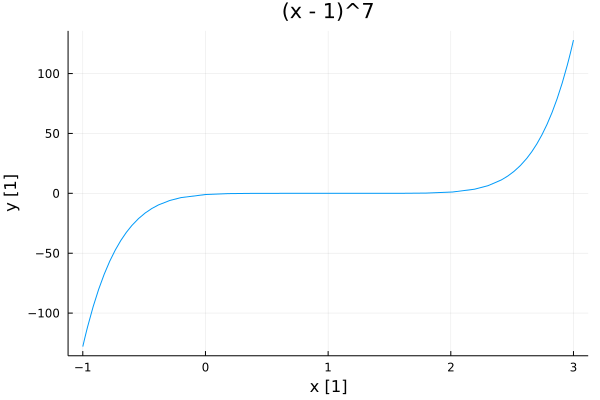

In [23]:
plot(f6, -1, 3, xlab="x [1]", ylab="y [1]", label="", title="(x - 1)^7")

In [24]:
test(f6, -1, 3)

Results of univariate zero finding:

* Converged to: 0.983422653204087
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 3,	 fx₂ = 128
x₃ = 0.023255813953488413,	 fx₃ = -0.84813667581153707
x₄ = 0.0428500896941384,	 fx₄ = -0.73596937147355734
x₅ = 0.16605846167149679,	 fx₅ = -0.28051057924708173
x₆ = 0.2399618867241059,	 fx₆ = -0.14650336443183945
x₇ = 0.31845894029425714,	 fx₇ = -0.068303691571876518
x₈ = 0.38531301008572028,	 fx₈ = -0.033157222870663326
x₉ = 0.44689770753223368,	 fx₉ = -0.015835734418894073
x₁₀ = 0.50198515042378333,	 fx₁₀ = -0.0075979432916675636
x₁₁ = 0.55178099854459339,	 fx₁₁ = -0.0036343926555306256
x₁₂ = 0.59660548983223605,	 fx₁₂ = -0.0017382405817845477
x₁₃ = 0.63700625552872203,	 fx₁₃ = -0.0008304127064310765
x₁₄ = 0.67339277938926501,	 fx₁₄ = -0.0003964427435927322
x₁₅ = 0.70616459852488112,	 fx₁₅ = -0.00018911624265572277
x₁₆ = 0.73567338717228314,	 fx₁₆ = -9.0154256391219376e-05
x₁₇ =

Results of univariate zero finding:

* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations ≈ 66
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 0.14285714285714285,	 fx₂ = -0.33991667708911394
x₃ = 0.26530612244897961,	 fx₃ = -0.11554334736330474
x₄ = 0.37026239067055394,	 fx₄ = -0.03927511069548776
x₅ = 0.46022490628904622,	 fx₅ = -0.013350265119917321
x₆ = 0.53733563396203965,	 fx₆ = -0.0045379777578209921
x₇ = 0.60343054339603397,	 fx₇ = -0.0015425343201428191
x₈ = 0.66008332291088623,	 fx₈ = -0.00052433314039886255
x₉ = 0.7086428482093311,	 fx₉ = -0.00017822957877208092
x₁₀ = 0.7502652984651409,	 fx₁₀ = -6.0583206175198271e-05
x₁₁ = 0.78594168439869216,	 fx₁₁ = -2.0593242130478093e-05
x₁₂ = 0.81652144377030755,	 fx₁₂ = -6.9999864354836591e-06
x₁₃ = 0.84273266608883501,	 fx₁₃ = -2.3794121288184786e-06
x₁₄ = 0.86519942807614425,	 fx₁₄ = -8.0880186425351355e-07
x₁₅ = 0.88445665263669504,	 fx

Results of univariate zero finding:

* Converged to: 0.9865580170713792
* Algorithm: Secant()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -0.9999576125888644
x₂ = 0,	 fx₂ = -1
x₃ = 0.14285973807225885,	 fx₃ = -0.33990947287321355
x₄ = 0.21642446331428594,	 fx₄ = -0.1813702625538253
x₅ = 0.30058316137369456,	 fx₅ = -0.081875240159861973
x₆ = 0.36983801904759422,	 fx₆ = -0.039460754412856125
x₇ = 0.43426999039973957,	 fx₇ = -0.018546609072015573
x₈ = 0.49140809310164607,	 fx₈ = -0.0088020962960889248
x₉ = 0.54302022535729633,	 fx₉ = -0.0041617774635777137
x₁₀ = 0.5893097620511607,	 fx₁₀ = -0.0019706098941453969
x₁₁ = 0.63093990493793606,	 fx₁₁ = -0.00093256610145046361
x₁₂ = 0.6683399263319808,	 fx₁₂ = -0.00044142034927470685
x₁₃ = 0.70195343196346782,	 fx₁₃ = -0.00020892426235644384
x₁₄ = 0.73215900214040375,	 fx₁₄ = -9.8887040655527031e-05
x₁₅ = 0.75930381186877538,	 fx₁₅ = -4.6804163449333489e-05
x₁₆ = 0.78369743563687011,	 fx₁₆ = -2.215295

Algorithm has not been run

In [25]:
push!(df, ["(x - 1)^7" "interval" 40 42 0.983422653204087 iszero(f6(0.983422653204087))])
push!(df, ["(x - 1)^7" "derivative" 33 66 0.9938233080518548 iszero(f6(0.9938233080518548))])
push!(df, ["(x - 1)^7" "derivativeApprox" 40 42 0.9865580170713792 iszero(f6(0.9865580170713792))])

,f,method,iterations,calls,x_zero,isZero
,String,String,Int64,Int64,Float64,Bool
1,sin(x) - x/2,interval,9,11,1.89549,1
2,sin(x) - x/2,derivative,1,2,0.0,1
3,sin(x) - x/2,derivativeApprox,0,2,0.0,1
4,x * exp(-x),interval,40,42,9.09495e-12,0
5,x * exp(-x),derivative,1,2,0.0,1
6,x * exp(-x),derivativeApprox,0,2,0.0,1
7,(x + 3) * (x - 1)^2,interval,8,10,-3.0,1
8,(x + 3) * (x - 1)^2,derivative,26,52,1.0,0
9,(x + 3) * (x - 1)^2,derivativeApprox,37,39,1.0,0


## zad.2
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

$f(x) = x \cdot e^{-x}$

In [26]:
f(x) = x * exp(-x)
D(f) = x -> ForwardDiff.derivative(f, float(x))
DD(f) = x -> ForwardDiff.derivative(D(f), float(x))

DD (generic function with 1 method)

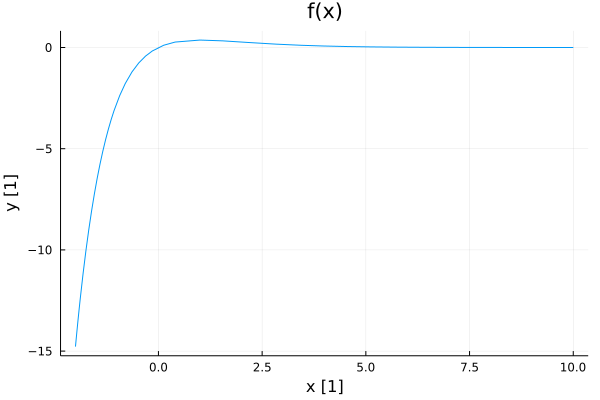

In [27]:
plot(f, -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "f(x)")

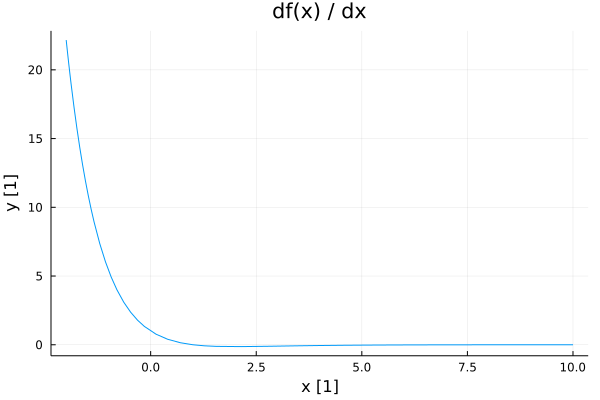

In [28]:
plot(D(f), -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "df(x) / dx")

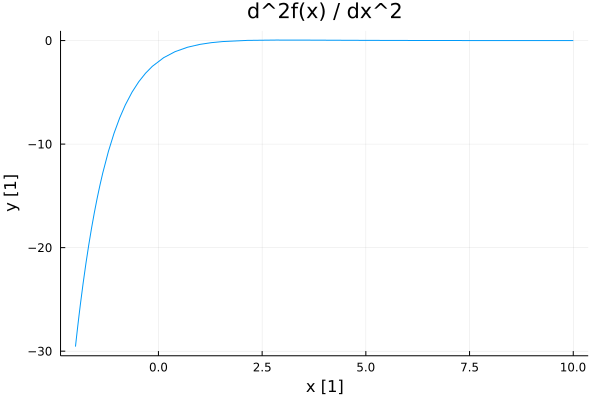

In [29]:
plot(DD(f), -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "d^2f(x) / dx^2")

### Metoda bisekcji

In [30]:
x = find_zero(f, (-2, 10), Bisection(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 10 )



true

### Metoda reguła falsi

In [31]:
find_zero(f, (-2, 10), FalsePosition(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 9.094947017729282e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 10,	 fx₂ = 0.00045399929762484856
x₃ = 5,	 fx₃ = 0.033689734995427337
x₄ = 2.5,	 fx₄ = 0.20521249655974699
x₅ = 1.25,	 fx₅ = 0.35813099607523763
x₆ = 0.625,	 fx₆ = 0.33453839282436892
x₇ = 0.3125,	 fx₇ = 0.22862988404582557
x₈ = 0.15625,	 fx₈ = 0.13364770739178478
x₉ = 0.078125,	 fx₉ = 0.072253813532516004
x₁₀ = 0.0390625,	 fx₁₀ = 0.037566039125211927
x₁₁ = 0.01953125,	 fx₁₁ = 0.019153481428506612
x₁₂ = 0.009765625,	 fx₁₂ = 0.0096707217175157068
x₁₃ = 0.0048828125,	 fx₁₃ = 0.0048590287551272607
x₁₄ = 0.00244140625,	 fx₁₄ = 0.0024354530555624979
x₁₅ = 0.001220703125,	 fx₁₅ = 0.0012192139180053556
x₁₆ = 0.0006103515625,	 fx₁₆ = 0.00060997914713386539
x₁₇ = 0.00030517578125,	 fx₁₇ = 0.00030508266320194771
x₁₈ = 0.000152587890625,	 fx₁₈ = 0.00015256460933690111
x₁₉ = 7.62939453125e-05,	 fx₁₉ = 7.6

true

### Metoda Newtona

In [32]:
x = find_zero((f, D(f)), -2, Roots.Newton(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: -2.032052099592921e-18
* Algorithm: Roots.Newton()
* iterations: 8
* function evaluations ≈ 16
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -14.778112197861301
x₂ = -1.3333333333333333,	 fx₂ = -5.0582238595775699
x₃ = -0.76190476190476186,	 fx₃ = -1.6322689592431341
x₄ = -0.32947232947232946,	 fx₄ = -0.45804374954051696
x₅ = -0.081650451447160044,	 fx₅ = -0.088596982538287114
x₆ = -0.0061635403679676792,	 fx₆ = -0.0062016469128125156
x₇ = -3.7756516056698143e-05,	 fx₇ = -3.775794163811521e-05
x₈ = -1.425500682806244e-09,	 fx₈ = -1.4255006848382961e-09
x₉ = -2.0320520995929209e-18,	 fx₉ = -2.0320520995929209e-18



false

### Metoda Halleya

In [33]:
x = find_zero((f, D(f), DD(f)), -2, Roots.Halley(), verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 5
* function evaluations ≈ 18
* stopped as f(x_n) = 0

Trace:
x₁ = -2,	 fx₁ = -14.778112197861301
x₂ = -0.7999999999999996,	 fx₂ = -1.7804327427939723
x₃ = -0.12075471698113194,	 fx₃ = -0.13625335713691178
x₄ = -0.00078046902930356543,	 fx₄ = -0.00078107839897541341
x₅ = -2.3751884530368028e-10,	 fx₅ = -2.375188453600955e-10
x₆ = 0,	 fx₆ = 0



true

### Metoda z kalkulatorów HP-34

In [34]:
x = find_zero(f, -2, verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 14
* function evaluations ≈ 17
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-4.8744159937079164e-11,3.744464448531951e-10]

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -14.77797796449957
x₂ = -2,	 fx₂ = -14.778112197861301
x₃ = -1.9993944472210572,	 fx₃ = -14.764694225178392
x₄ = -1.9388391693267764,	 fx₄ = -13.476246228157748
x₅ = -1.305474192855187,	 fx₅ = -4.8164663356020325
x₆ = -0.953204143826899,	 fx₆ = -2.4726191101781154
x₇ = -0.58158024030512023,	 fx₇ = -1.0403673919370258
x₈ = -0.31163789262672875,	 fx₈ = -0.42559143183683862
x₉ = -0.12476469374119972,	 fx₉ = -0.14134365674978397
x₁₀ = -0.031841041934528969,	 fx₁₀ = -0.032871207625670272
x₁₁ = -0.0036817012306272351,	 fx₁₁ = -0.0036952811378198015
x₁₂ = -0.00011517591051782685,	 fx₁₂ = -0.00011518917677215227
x₁₃ = -4.2323934895021134e-07,	 fx₁₃ = -4.23239

true

### Metoda siecznych

In [35]:
x = find_zero(f, -2, Order1(),  verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: -8.697677347131879e-17
* Algorithm: Secant()
* iterations: 11
* function evaluations ≈ 13
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -14.77797796449957
x₂ = -2,	 fx₂ = -14.778112197861301
x₃ = -1.3333306419842814,	 fx₃ = -5.058200036092888
x₄ = -0.98639880611431496,	 fx₄ = -2.6450878242524376
x₅ = -0.60611596207479068,	 fx₅ = -1.1111905492360754
x₆ = -0.33063030262681475,	 fx₆ = -0.46018617842281528
x₇ = -0.13589321864490342,	 fx₇ = -0.15567377611947864
x₈ = -0.036339121719282094,	 fx₈ = -0.037683940262601918
x₉ = -0.0045432418945730788,	 fx₉ = -0.0045639299012097522
x₁₀ = -0.00016177688040689212,	 fx₁₀ = -0.00016180305428303322
x₁₁ = -7.3326531404790691e-07,	 fx₁₁ = -7.3326585172612486e-07
x₁₂ = -1.1861573663054946e-10,	 fx₁₂ = -1.1861573664461916e-10
x₁₃ = -8.6976773471318787e-17,	 fx₁₃ = -8.6976773471318787e-17



false

### Metoda Steffensena

In [36]:
x = find_zero(f, -2, Order2(), verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 10
* function evaluations ≈ 14
* stopped as f(x_n) = 0

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -14.77797796449957
x₂ = -2,	 fx₂ = -14.778112197861301
x₃ = -1.3333306419842814,	 fx₃ = -5.058200036092888
x₄ = -0.98639880611431496,	 fx₄ = -2.6450878242524376
x₅ = -0.60611596207479068,	 fx₅ = -1.1111905492360754
x₆ = -0.33063030262681475,	 fx₆ = -0.46018617842281528
x₇ = -0.13589321864490342,	 fx₇ = -0.15567377611947864
x₈ = -0.036339121719282094,	 fx₈ = -0.037683940262601918
x₉ = -0.0045432418945730788,	 fx₉ = -0.0045639299012097522
x₁₀ = -0.00016177688040689212,	 fx₁₀ = -0.00016180305428303322
x₁₁ = 4.2339855850937608e-12,	 fx₁₁ = 4.2339855850758342e-12
x₁₂ = 0,	 fx₁₂ = 0



true

W przypadku badanej funkcji metody Newtona i siecznych nie dały rady znaleźć wystarczająco dokładnie pierwiastków

## zad.3
Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

### Metoda reguł falsi

$ f(x) = sin(x) $

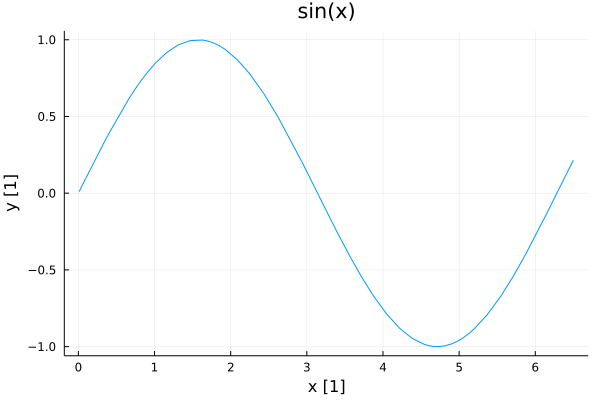

In [37]:
f(x) = sin(x)
a, b = 0.01, 6.5
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "sin(x)")

In [38]:
intervalFalsi(f, a, b)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Metoda nie działa, ponieważ wartości na krańcach oraz w jego środku są tego samego znaku (algorytm opiera się na fakcie, że dla funkcji ciągłej w przedziale [a,b] o różnych znakach na jego końcu funkcja w tym przedziale ma pierwiastek).

### Metoda Newtona

$ f(x) = sgn(x) \cdot \sqrt{|x|} $

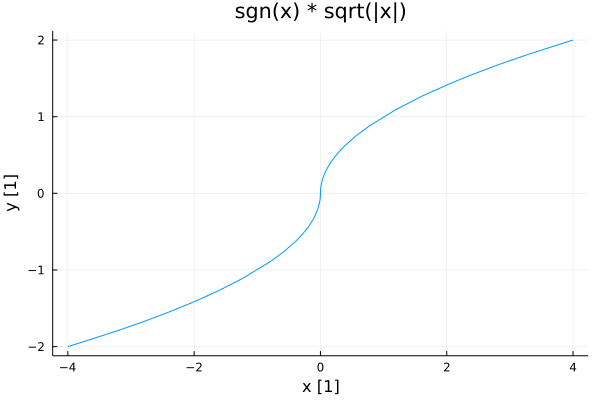

In [39]:
f(x) = sign(x) * sqrt(abs(x))
a, b = -4, 4
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "sgn(x) * sqrt(|x|)")

In [40]:
D(f) = x -> ForwardDiff.derivative(f, float(x))
find_zero((f, D(f)), -1, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = -1,	 fx₁ = -1
x₂ = 1,	 fx₂ = 1
x₃ = -1,	 fx₃ = -1
x₄ = 1,	 fx₄ = 1
x₅ = -1,	 fx₅ = -1
x₆ = 1,	 fx₆ = 1
x₇ = -1,	 fx₇ = -1
x₈ = 1,	 fx₈ = 1
x₉ = -1,	 fx₉ = -1
x₁₀ = 1,	 fx₁₀ = 1
x₁₁ = -1,	 fx₁₁ = -1
x₁₂ = 1,	 fx₁₂ = 1
x₁₃ = -1,	 fx₁₃ = -1
x₁₄ = 1,	 fx₁₄ = 1
x₁₅ = -1,	 fx₁₅ = -1
x₁₆ = 1,	 fx₁₆ = 1
x₁₇ = -1,	 fx₁₇ = -1
x₁₈ = 1,	 fx₁₈ = 1
x₁₉ = -1,	 fx₁₉ = -1
x₂₀ = 1,	 fx₂₀ = 1
x₂₁ = -1,	 fx₂₁ = -1
x₂₂ = 1,	 fx₂₂ = 1
x₂₃ = -1,	 fx₂₃ = -1
x₂₄ = 1,	 fx₂₄ = 1
x₂₅ = -1,	 fx₂₅ = -1
x₂₆ = 1,	 fx₂₆ = 1
x₂₇ = -1,	 fx₂₇ = -1
x₂₈ = 1,	 fx₂₈ = 1
x₂₉ = -1,	 fx₂₉ = -1
x₃₀ = 1,	 fx₃₀ = 1
x₃₁ = -1,	 fx₃₁ = -1
x₃₂ = 1,	 fx₃₂ = 1
x₃₃ = -1,	 fx₃₃ = -1
x₃₄ = 1,	 fx₃₄ = 1
x₃₅ = -1,	 fx₃₅ = -1
x₃₆ = 1,	 fx₃₆ = 1
x₃₇ = -1,	 fx₃₇ = -1
x₃₈ = 1,	 fx₃₈ = 1
x₃₉ = -1,	 fx₃₉ = -1
x₄₀ = 1,	 fx₄₀ = 1
x₄₁ = -1,	 fx₄₁ = -1
x₄₂ = 1,	 fx₄₂ = 1



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

W trakcie działania algorytm "przeskakuje" cały czas z "lewej na prawą" zmieniając tylko znak

### Metoda siecznych

$ \frac{x^{2} + 2x + 2}{x^{2} - 2x + 2} $

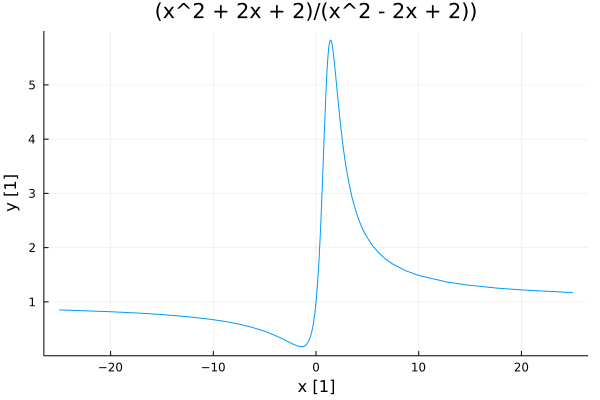

In [41]:
f(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2)
a, b = -25, 25
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "(x^2 + 2x + 2)/(x^2 - 2x + 2))")

In [42]:
find_zero(f, -2, verbose=true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Secant()

Trace:
x₁ = -1.9999939444722106,	 fx₁ = 0.19999951555895026
x₂ = -2,	 fx₂ = 0.20000000000000001
x₃ = -1.9993944472210572,	 fx₃ = 0.19995156751793952
x₄ = -1.9388391693267764,	 fx₄ = 0.19523324518726415
x₅ = -1.8830022297196667,	 fx₅ = 0.19112434709606699
x₆ = -1.8412928307256533,	 fx₆ = 0.18822704606435364
x₇ = -1.8034900476901377,	 fx₇ = 0.18574251052962051
x₈ = -1.770120539853941,	 fx₈ = 0.18367131976851178
x₉ = -1.7376604672358098,	 fx₉ = 0.18177540633714287



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")